<a href="https://colab.research.google.com/github/tamayodb/CCMACLRL_EXERCISES_COM222ML/blob/main/EXERCISE5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
df = pd.read_excel('traveldata.xlsx')

In [9]:
df.describe()

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
count,10.000000,10.000000,10.00000,10.000000
mean,79.600000,3.100000,3.51700,6.390000
std,19.995555,1.595131,0.28562,0.867243
min,44.000000,1.000000,3.03000,4.800000
25%,68.500000,2.250000,3.31500,5.800000
50%,77.500000,3.000000,3.55500,6.500000
75%,86.750000,3.750000,3.72750,7.000000
max,111.000000,6.000000,3.89000,7.400000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Miles Traveled        10 non-null     int64  
 1   Number of Deliveries  10 non-null     int64  
 2   Gas Price             10 non-null     float64
 3   Travel Time           10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 448.0 bytes


## A. Correlation

### Check the relationships between each independent variable and the dependent variable using scatterplots and correlations.

1. Create scatter plot between miles traveled and travel time

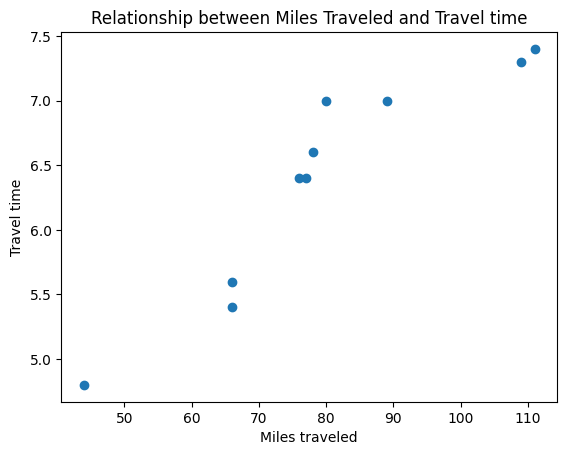

In [16]:
plt.scatter(df['Miles Traveled'], df['Travel Time'])
plt.title('Relationship between Miles Traveled and Travel time')
plt.xlabel('Miles traveled')
plt.ylabel('Travel time')
plt.show()

2. Create scatter plot between number of deliveries and travel time

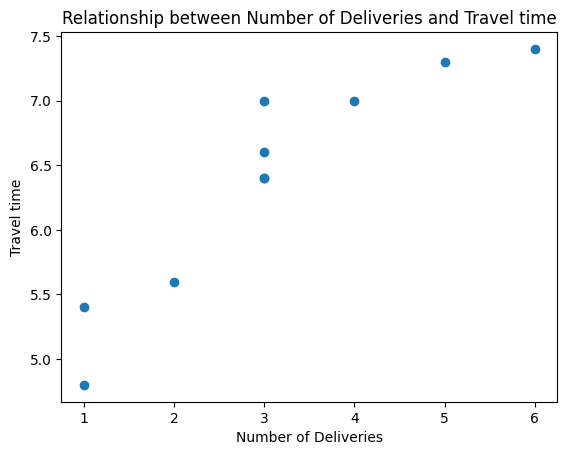

In [15]:
plt.scatter(df['Number of Deliveries'], df['Travel Time'])
plt.title('Relationship between Number of Deliveries and Travel time')
plt.xlabel('Number of Deliveries')
plt.ylabel('Travel time')
plt.show()

3. Create scatter plot between Gas Price and Travel time

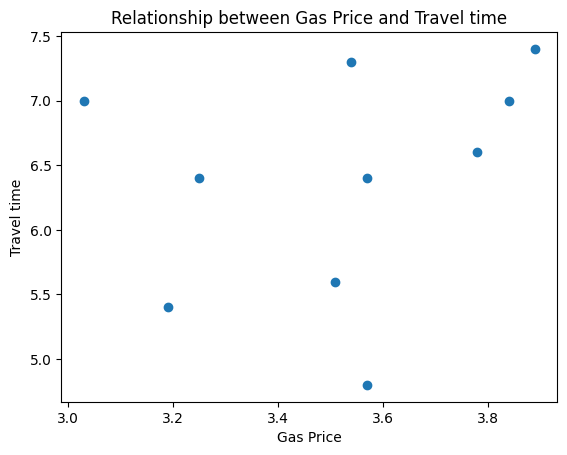

In [14]:
plt.scatter(df['Gas Price'], df['Travel Time'])
plt.title('Relationship between Gas Price and Travel time')
plt.xlabel('Gas Price')
plt.ylabel('Travel time')
plt.show()

4. Create a pairplot

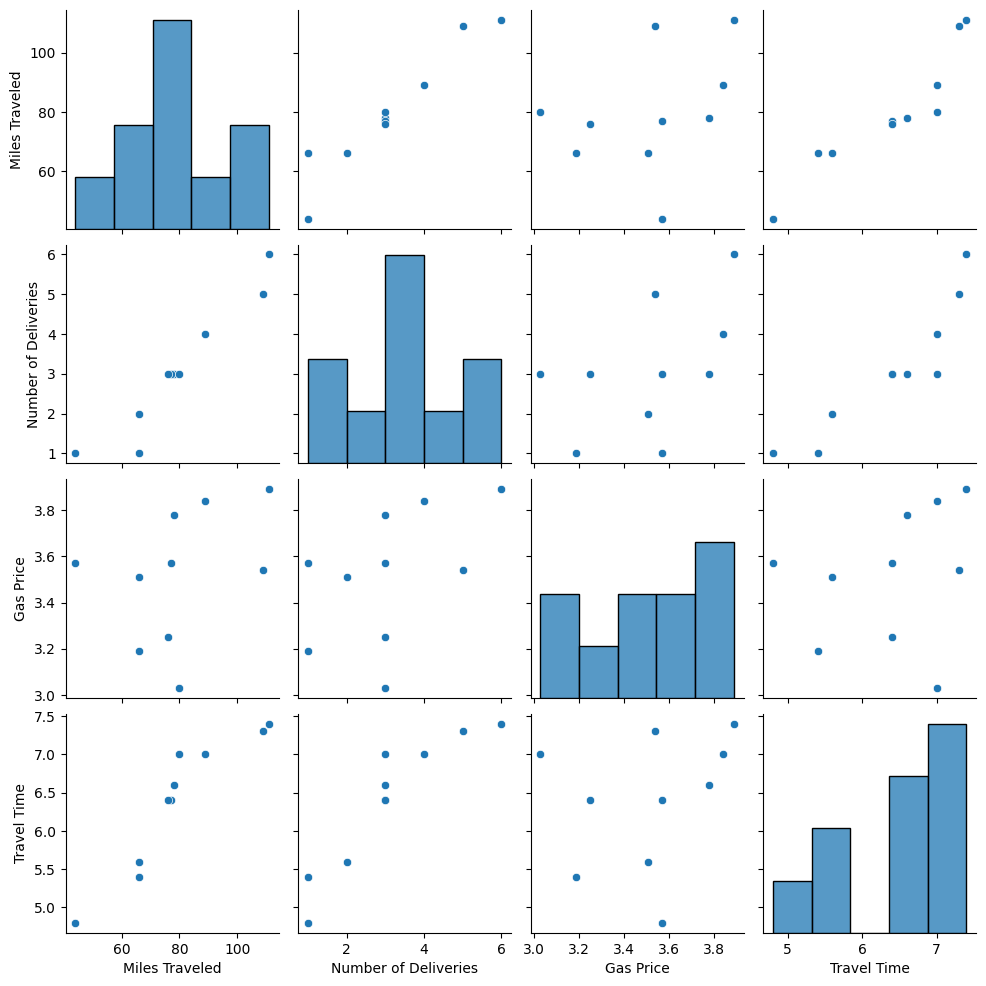

In [18]:
sns.pairplot(df)
plt.show()

5. Calculate r-squared and p-value between Miles Traveled and Travel Time

In [36]:
result = pearsonr(df['Miles Traveled'], df['Travel Time'])
print(f"Miled Traveled and Travel Time")
print(f"Correlation Coefficient: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

Miled Traveled and Travel Time
Correlation Coefficient: 0.9282
p-value: 0.0001


6. Calculate r-squared and p-value between Number of Deliveries and Travel Time

In [37]:
result = pearsonr(df['Number of Deliveries'], df['Travel Time'])
print(f"Number of Deliveries and Travel Time")
print(f"Correlation Coefficient: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

Number of Deliveries and Travel Time
Correlation Coefficient: 0.9164
p-value: 0.0002


7. Calculate r-squared and p-value between Gas Price and Travel Time

In [39]:
result = pearsonr(df['Gas Price'], df['Travel Time'])
print(f"Gas Price and Travel Time")
print(f"Correlation Coefficient: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

Gas Price and Travel Time
Correlation Coefficient: 0.2672
p-value: 0.4555


### Check the relationships among the independent variables using scatterplots and correlations.

8. Create scatter plot between Miles Traveled and Number of Deliveries.

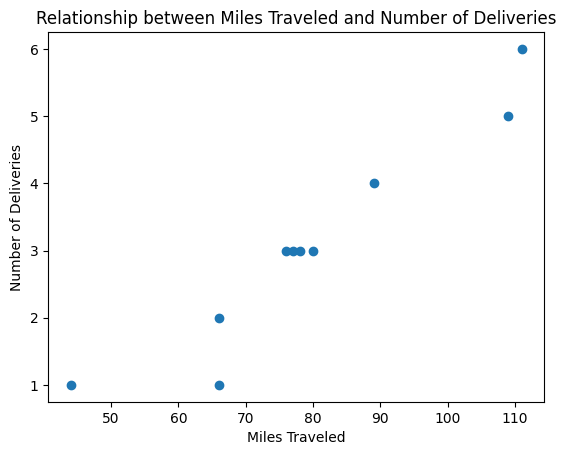

In [25]:
plt.scatter(df['Miles Traveled'], df['Number of Deliveries'])
plt.title('Relationship between Miles Traveled and Number of Deliveries')
plt.xlabel('Miles Traveled')
plt.ylabel('Number of Deliveries')
plt.show()

9. Create scatter plot between Miles traveled and Gas Price

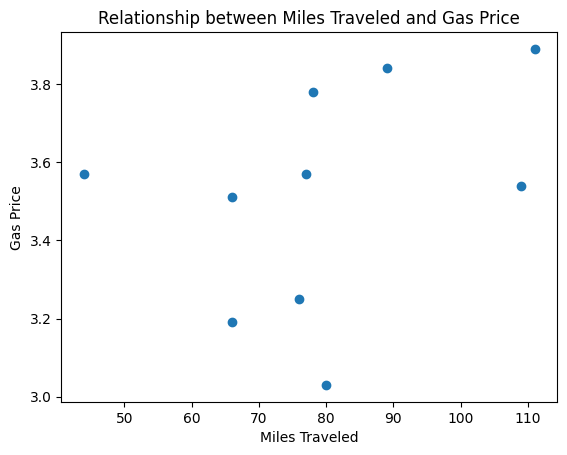

In [26]:
plt.scatter(df['Miles Traveled'], df['Gas Price'])
plt.title('Relationship between Miles Traveled and Gas Price')
plt.xlabel('Miles Traveled')
plt.ylabel('Gas Price')
plt.show()

10. Create scatter plot between Number of Deliveries and Gas Price

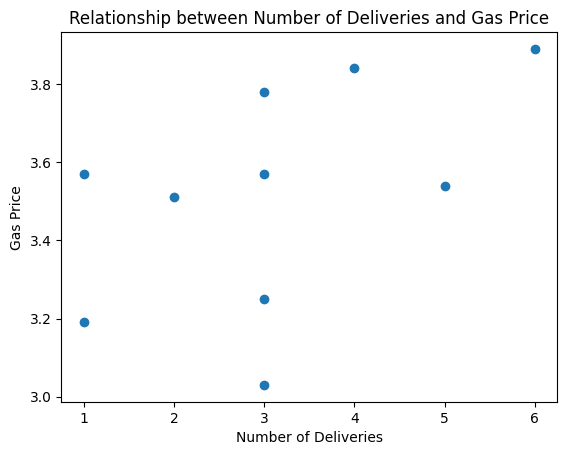

In [27]:
plt.scatter(df['Number of Deliveries'], df['Gas Price'])
plt.title('Relationship between Number of Deliveries and Gas Price')
plt.xlabel('Number of Deliveries')
plt.ylabel('Gas Price')
plt.show()

11. Calculate r-squared and p-value between Miles Traveled and Number of Deliveries

In [43]:
corr, p_value = pearsonr(df['Miles Traveled'], df['Number of Deliveries'])
print(f"Miles Traveled and Number of Deliveries")
print(f"Correlation Coefficient: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

Miles Traveled and Number of Deliveries
Correlation Coefficient: 0.9559
p-value: 0.0000


12. Calculate r-squared and p-value between Miles Traveled and Gas Price

In [45]:
corr, p_value = pearsonr(df['Miles Traveled'], df['Gas Price'])
print(f"Miles Traveled and Gas Price")
print(f"Correlation Coefficient: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

Miles Traveled and Gas Price
Correlation Coefficient: 0.3558
p-value: 0.3130


13. Calculate r-squared and p-value between Number of Deliveries and Gas Price

In [48]:
corr, p_value = pearsonr(df['Number of Deliveries'], df['Gas Price'])
print(f"Number of Deliveries and Gas Price")
print(f"Correlation Coefficient: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

Number of Deliveries and Gas Price
Correlation Coefficient: 0.4982
p-value: 0.1427


### Correlation Summary

14. Create the correlation summary

In [49]:
corr_matrix = df.corr()
corr_matrix

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
Miles Traveled,1.000000,0.955898,0.355796,0.928179
Number of Deliveries,0.955898,1.000000,0.498242,0.916443
Gas Price,0.355796,0.498242,1.000000,0.267212
Travel Time,0.928179,0.916443,0.267212,1.000000


15. Create a correlation matrix

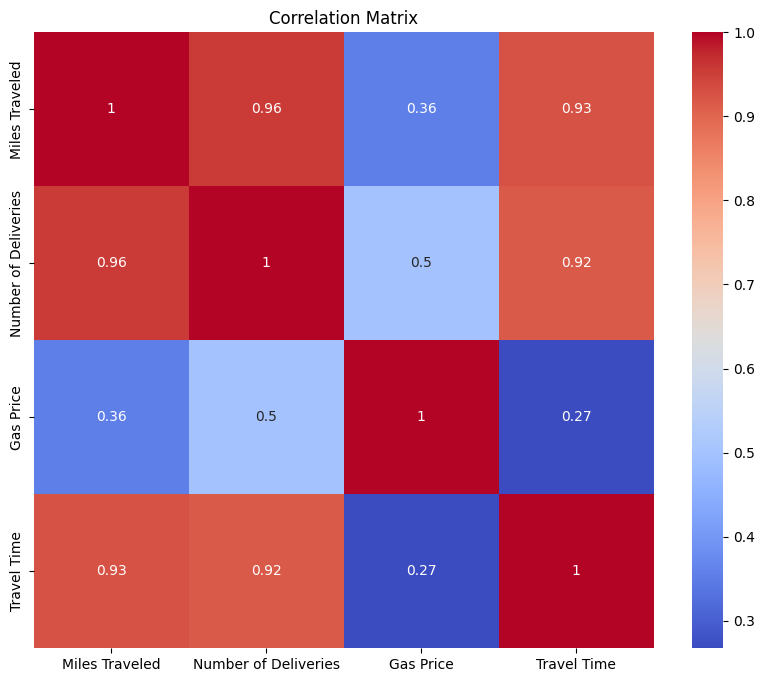

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Building Different Regression Models

### Model 1: Miles Traveled and Travel Time

16. Set independent and dependent variables

In [53]:
X = df[['Miles Traveled']]
X = sm.add_constant(X)
y = df['Travel Time']

17. Build and train the model

In [57]:
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:' , mlr_model.intercept_)
print('Coefficients:' , mlr_model.coef_)

Intercept: 3.1855602489995554
Coefficients: [0.         0.04025678]


18. Display the statistical summary

In [58]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           0.000107
Time:                        09:21:12   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1856      0.467      6.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


19. Display the r-squared

In [59]:
olsres.rsquared

0.8615153295097224

### Model 2: Number of Deliveries and Travel Time

Set independent and dependent variables

In [60]:
X = df[['Number of Deliveries']]
X = sm.add_constant(X)
y = df['Travel Time']

Build and train the model

In [61]:
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:' , mlr_model.intercept_)
print('Coefficients:' , mlr_model.coef_)

Intercept: 4.84541484716157
Coefficients: [0.         0.49825328]


Display the statistical summary

In [62]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     41.96
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           0.000193
Time:                        09:28:17   Log-Likelihood:                -3.0794
No. Observations:                  10   AIC:                             10.16
Df Residuals:                       8   BIC:                             10.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8454 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Display the r-squared

In [63]:
olsres.rsquared

0.8398684988913625

### Model 3: Gas Price and Travel Time

Set independent and dependent variables

In [73]:
X = df[['Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

Build and train the model

In [74]:
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:' , mlr_model.intercept_)
print('Coefficients:' , mlr_model.coef_)

Intercept: 3.536488198199421
Coefficients: [0.         0.81134825]


Display the statistical summary

In [75]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.6151
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.455
Time:                        09:36:54   Log-Likelihood:                -11.868
No. Observations:                  10   AIC:                             27.74
Df Residuals:                       8   BIC:                             28.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5365      3.649      0.969      0.3

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Display the r-squared

In [76]:
olsres.rsquared

0.07140200230972338